In [1]:
# pip install jiwer seaborn matplotlib spacy num2words
# python -m spacy download de_core_news_sm 
import json
import jiwer as ji
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import numpy as np

import string

In [2]:
src = pd.read_csv('test_public_ground_truth.csv')

In [3]:
src['sentence']=src['sentence'].str.replace(r"[{}]".format( string.punctuation), ' ')

In [4]:
fhnw = pd.read_csv('test_public_submission_fhnw.csv')


In [5]:
ude = pd.read_csv('test_public_submission_ude.csv')


In [6]:
uzh = pd.read_csv('test_public_submission_uzh.csv')


In [7]:
zhaw = pd.read_csv('test_public_submission_zhaw.csv')


In [8]:

for d1,ds in enumerate([fhnw, ude, uzh, zhaw]):
    wers= []
    lrs = []
    for i in range(len(src)):
        if pd.isnull(ds['sentence'].iloc[i]):
            sent=""
        else:
            sent=ds['sentence'].iloc[i]
        wer = ji.wer(src['sentence'].iloc[i], sent)
        length_ratio = len(sent)/len(src['sentence'].iloc[i])
        wers.append(wer)
        lrs.append(length_ratio)
    ds.loc[:,'wer'] = wers
    ds.loc[:,'length_ratio'] = lrs

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Length Ratio')]

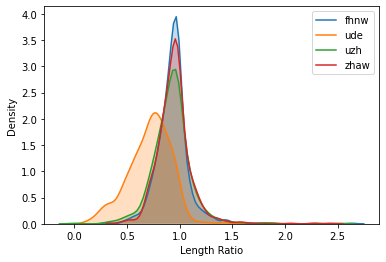

In [9]:
ax = sns.kdeplot(fhnw['length_ratio'], label="fhnw",shade=True, legend=True)
sns.kdeplot(ude['length_ratio'], label="ude",shade=True)
sns.kdeplot(uzh['length_ratio'], label="uzh",shade=True)
sns.kdeplot(zhaw['length_ratio'],label="zhaw", shade=True)

sns.set_style("whitegrid")
ax.set(xlabel='Length Ratio', ylabel='Density')


In [10]:
fhnw['wer'].mean(),ude['wer'].mean(),uzh['wer'].mean(),zhaw['wer'].mean()

(0.3606219724341026,
 0.5893871781984995,
 0.45445036533319655,
 0.4023165635259171)

# Normalizing Numbers

In [11]:
pd.set_option('display.max_colwidth',150)

In [15]:
from num2words import num2words
nlp = spacy.load('de_core_news_sm')
for d1,ds in enumerate([src,fhnw, ude, uzh, zhaw]):
    snts=[]

    for i in range(len(src)):
        if pd.isnull(ds['sentence'].iloc[i]):
            snts.append(" ")
            continue
        snts.append(" ".join([num2words(token.text, lang="de") 
                              if token.pos_ =='NUM' and  token.text.isdigit() 
                              else token.text 
                              for token in nlp(ds.iloc[i]['sentence']) ]))
    ds['sentence_n'] = snts

In [16]:

for d1,ds in enumerate([fhnw, ude, uzh, zhaw]):
    wers= []
    for i in range(len(src)):
        if pd.isnull(ds['sentence'].iloc[i]):
            sent=""
        else:
            sent=ds['sentence_n'].iloc[i]
        wer = ji.wer(src['sentence_n'].iloc[i], sent)
        wers.append(wer)
    
    ds.loc[:,'wer_n'] = wers
    

In [18]:
fhnw['wer_n'].mean(),ude['wer_n'].mean(),uzh['wer_n'].mean(),zhaw['wer_n'].mean()

(0.36035760598611744,
 0.5893871781984995,
 0.4520553696345616,
 0.39489567094911526)

# Check what/where zhaw approach did not do better than fhnw

In [31]:
fhnw[fhnw['wer']<zhaw['wer']][['sentence_n','wer']]

,sentence_n,wer
3,wir sind aber froh dass der regierungsrat diese postulat annimmt,0.363636
4,die betreuungsverhältnisse bei den tagesschulen beträgt zehn im kindergarten bis eins zu zweiundzwanzig,0.428571
5,hier ist unseres erachtens auch noch anpassungspotenzial vorhanden,0.333333
6,diese erkenntnis hat sicher für die ganze schweiz gültig,0.111111
9,wir sind ebenfalls der meinung dass eine kassenhilfe eine kindergarten lehrkräfte in vielen bereichen unterstützen und entlasten kann,0.111111
11,deshalb ist der regierungsrat bekannt,0.800000
14,der zeitpunkt sind uns durchaus richtig und wichtig weil wir am ende der legislatur entgegennehmen und die neuen richtlinien der regierung irgendw...,0.333333
17,ich zitiere hier wörtlich aus dem protokoll der debatte vor fünf jahren meine altfunde mathias bromt das wir bei dieser debatte ganz besonders fällen,0.545455
18,nämlich der von münsingen an die dritte strasse geht in zukunft in ostermundigen,0.500000
19,bravo einer baudirektion für den mut die ein holzbau zu machen und auch für den mut einen solchen qualitativ hochstehenden wettbewerb durch,0.318182


In [33]:
src[fhnw['wer']<zhaw['wer']][['sentence_n', 'path']]

,sentence_n,path
3,wir sind jedoch froh dass der regierungsrat die drei postulate annimmt,242.flac
4,das betreuungsverhältnis in den tagesschulen beträgt eins zehn und im kindergarten bis eins zweiundzwanzig,243.flac
5,hier ist unseres erachtens anpassungspotenzial vorhanden,244.flac
6,diese erkenntnis hat sicher für die ganze schweiz gültigkeit,245.flac
9,wir sind ebenfalls der meinung dass eine klassenhilfe eine kindergarten lehrkraft in vielen bereichen unterstützen und entlasten kann,248.flac
11,sie sind beim regierungsrat vorausgegangen,259.flac
14,der zeitpunkt scheint uns richtig und wichtig denn wir gehen dem ende der legislatur entgegen und die neuen richtlinien der regierung werden i...,316.flac
17,ich zitiere hier wörtlich aus dem protokoll der vor vier jahren geführten debatte aus dem jahr zweitausenddreizehn aus einem votum meines alten ...,472.flac
18,wer von münsingen an die reiterstrasse gelangen will steigt in zukunft in ostermundigen um,476.flac
19,bravo auch an die baudirektion für den mut einen holzbau zu machen und auch für den mut einen qualitativ hochstehenden wettbewerb durchzuführen,652.flac


In [32]:
zhaw[fhnw['wer']<zhaw['wer']][['sentence_n','wer']]

,sentence_n,wer
3,sind aber froh dass der regierungsrat die postulat annehmen,0.454545
4,die betreuungsverhältnis der tagesschulen beträgt eins zu zehn im kindergarten bis eins zu zweiundzwanzig,0.642857
5,hier ist unser erachten auch ein anpassungseifers,0.833333
6,diese erkenntnisse hat sicher für die ganze schweiz gültig,0.222222
9,wir sind ebenfalls der meinung dass eine kasse wölfe einen kindergarten lehrkräfte in vielen bereichen unterstützen und entlasten,0.277778
11,der vor der er regierungsrat bekannt,1.000000
14,der zeitpunkt sind uns durchaus richtig und wichtig weil wir amende der legislatur entgegen und die neuen richtlinien der regierung eigenen,0.375000
17,ich zitiere hier wörtlich aus dem protokoll der debatte vor fünf jahren wie alt freunde mathias tromelin dieser debatte ganz besonders felder,0.575758
18,die eier von münsingen an dritte strasse g schaffen wird in zukunft in ostermundigen umsteigen,0.571429
19,die raveline baudirektion um den mut diese holzbau zu machen und auch für den mut einen solchen qualitativ vorstehenden wettbewerb,0.409091


# Check Number of deletions/replaces/inserts

In [36]:
import Levenshtein
# inspered by jiwer
from collections import Counter
for d1,ds in enumerate([fhnw, ude, uzh, zhaw]):
    dels = []
    inss = []
    repls = []
    for i in range(len(src)):
        if pd.isnull(ds['sentence'].iloc[i]):
            sent=""
        else:
            sent=ds['sentence_n'].iloc[i]
        ops = Levenshtein.editops(src['sentence_n'].iloc[i], sent)
        od = Counter([tk[0] for tk  in ops])
        for li,wo in zip([dels,inss,repls],['delete','insert','replace']):
            if wo in od:
                li.append(od[wo])
            else:
                li.append(0)
    
    ds.loc[:,'del_n'] = dels
    ds.loc[:,'ins_n'] = inss
    ds.loc[:,'rep_n'] = repls

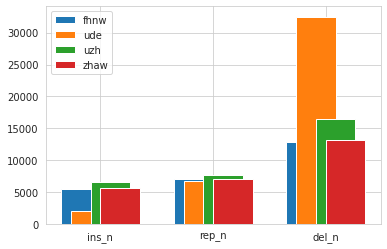

In [120]:
dels_b = pd.concat([fhnw['del_n'],zhaw['del_n']], axis=1)
dels_b.columns = ['fhnw','zhaw']
x=np.array([0,1,2])
labels=['ins_n', 'rep_n','del_n']

fig, ax = plt.subplots()
width = 0.35
ax.bar(x-2*width/4,fhnw[labels].sum(0), width, label='fhnw')
ax.bar(x-width/4,ude[labels].sum(0), width,label='ude')
ax.bar(x+width/4,uzh[labels].sum(0), width,label='uzh')
ax.bar(x+2*width/4,zhaw[labels].sum(0), width,label='zhaw')

ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend()


fhnw    12884
zhaw    13088
dtype: int64

# Check error which occur frequently comparing FHNW and ZHAW

In [71]:
(fhnw['wer']<zhaw['wer']).sum(), (fhnw['wer']>zhaw['wer']).sum(), (fhnw['wer']==zhaw['wer']).sum()

(502, 277, 228)

In [74]:
pd.concat([src[fhnw['wer']<zhaw['wer']]['sentence_n'],fhnw[fhnw['wer']<zhaw['wer']]['sentence_n'],fhnw[fhnw['wer']<zhaw['wer']]['wer'],zhaw[fhnw['wer']<zhaw['wer']]['sentence_n'],zhaw[fhnw['wer']<zhaw['wer']]['wer'],zhaw[fhnw['wer']<zhaw['wer']]['path']],axis=1)

,sentence_n,sentence_n,wer,sentence_n,wer,path
3,wir sind jedoch froh dass der regierungsrat die drei postulate annimmt,wir sind aber froh dass der regierungsrat diese postulat annimmt,0.363636,sind aber froh dass der regierungsrat die postulat annehmen,0.454545,242.flac
4,das betreuungsverhältnis in den tagesschulen beträgt eins zehn und im kindergarten bis eins zweiundzwanzig,die betreuungsverhältnisse bei den tagesschulen beträgt zehn im kindergarten bis eins zu zweiundzwanzig,0.428571,die betreuungsverhältnis der tagesschulen beträgt eins zu zehn im kindergarten bis eins zu zweiundzwanzig,0.642857,243.flac
5,hier ist unseres erachtens anpassungspotenzial vorhanden,hier ist unseres erachtens auch noch anpassungspotenzial vorhanden,0.333333,hier ist unser erachten auch ein anpassungseifers,0.833333,244.flac
6,diese erkenntnis hat sicher für die ganze schweiz gültigkeit,diese erkenntnis hat sicher für die ganze schweiz gültig,0.111111,diese erkenntnisse hat sicher für die ganze schweiz gültig,0.222222,245.flac
9,wir sind ebenfalls der meinung dass eine klassenhilfe eine kindergarten lehrkraft in vielen bereichen unterstützen und entlasten kann,wir sind ebenfalls der meinung dass eine kassenhilfe eine kindergarten lehrkräfte in vielen bereichen unterstützen und entlasten kann,0.111111,wir sind ebenfalls der meinung dass eine kasse wölfe einen kindergarten lehrkräfte in vielen bereichen unterstützen und entlasten,0.277778,248.flac
11,sie sind beim regierungsrat vorausgegangen,deshalb ist der regierungsrat bekannt,0.800000,der vor der er regierungsrat bekannt,1.000000,259.flac
14,der zeitpunkt scheint uns richtig und wichtig denn wir gehen dem ende der legislatur entgegen und die neuen richtlinien der regierung werden i...,der zeitpunkt sind uns durchaus richtig und wichtig weil wir am ende der legislatur entgegennehmen und die neuen richtlinien der regierung irgendw...,0.333333,der zeitpunkt sind uns durchaus richtig und wichtig weil wir amende der legislatur entgegen und die neuen richtlinien der regierung eigenen,0.375000,316.flac
17,ich zitiere hier wörtlich aus dem protokoll der vor vier jahren geführten debatte aus dem jahr zweitausenddreizehn aus einem votum meines alten ...,ich zitiere hier wörtlich aus dem protokoll der debatte vor fünf jahren meine altfunde mathias bromt das wir bei dieser debatte ganz besonders fällen,0.545455,ich zitiere hier wörtlich aus dem protokoll der debatte vor fünf jahren wie alt freunde mathias tromelin dieser debatte ganz besonders felder,0.575758,472.flac
18,wer von münsingen an die reiterstrasse gelangen will steigt in zukunft in ostermundigen um,nämlich der von münsingen an die dritte strasse geht in zukunft in ostermundigen,0.500000,die eier von münsingen an dritte strasse g schaffen wird in zukunft in ostermundigen umsteigen,0.571429,476.flac
19,bravo auch an die baudirektion für den mut einen holzbau zu machen und auch für den mut einen qualitativ hochstehenden wettbewerb durchzuführen,bravo einer baudirektion für den mut die ein holzbau zu machen und auch für den mut einen solchen qualitativ hochstehenden wettbewerb durch,0.318182,die raveline baudirektion um den mut diese holzbau zu machen und auch für den mut einen solchen qualitativ vorstehenden wettbewerb,0.409091,652.flac


In [73]:
pd.concat([src[fhnw['wer']>zhaw['wer']]['sentence_n'],fhnw[fhnw['wer']>zhaw['wer']]['sentence_n'],fhnw[fhnw['wer']>zhaw['wer']]['wer'],zhaw[fhnw['wer']>zhaw['wer']]['sentence_n'],zhaw[fhnw['wer']>zhaw['wer']]['wer'],zhaw[fhnw['wer']>zhaw['wer']]['path']],axis=1)

,sentence_n,sentence_n,wer,sentence_n,wer,path
1,und vielen dank an dieser stelle auch für die gesammelten werke deiner geschichten,wir sind an dieser stelle auch für die gesammelten werke dieser geschichte,0.384615,nach sind an dieser stelle auch für die gesammelten werke dieser geschichten,0.307692,16.flac
10,zuerst möchte ich der fdp ein kompliment machen,ich möchte zuerst einmal eine fdp ein kompliment machen,0.500000,ich möchte zuerst einmal der fdp ein kompliment machen,0.375000,258.flac
12,die bdp fraktion bedauert natürlich dass der kanton bern die gemeinde clavaleyres an den kanton freiburg verliert,die bdp fraktion bedauert es natürlich dass der kanton bern die gemeinde clavaleyres aus dem kanton für diese wort verliert,0.352941,die bdp fraktion bedauert es natürlich dass der kanton bern die gemeinde cleyres aus dem kanton freiburg verliert,0.235294,286.flac
20,der transport wird in minergie p eco gewichtet,dieser transport wird gewichtet in minergie pegco,0.625000,transport wird gerichtet im minergie p eco,0.500000,653.flac
22,es liegt natürlich in der natur der sache dass die durchschnittlichen jährlichen ausgaben relativ stark schwanken können,es liegt in der natur der sache dass die durchschnittlichen ausgaben relativ stark schwanken können,0.117647,es liegt in der natur der sache dass die durchschnittlichen jährlichen ausgaben relativ stark schwanken können,0.058824,701.flac
24,im portfolio des kantons bern befinden sich rund zweitausendvierhundert gebäude,im portfolio des kantons bern sind rund zweihundert vierhundert gebäude,0.400000,im portfolio des kantons bern sind rund zweitausendvierhundert gebäude,0.300000,703.flac
27,sie legt eine sehr hohe kostendisziplin an den tag wenn es um die einhaltung des rahmenkredits geht,es geht um eine sehr hohe kostendisziplin wenn es um die einhaltung dieses rahmenkredits einen tag,0.529412,die eine sehr hohe kostendisziplin wenn es um die einhaltung des rahmenkredit,0.411765,708.flac
32,ich bin gespannt wie kreativ und mutig wir dann sein werden,wir sind gespannt mit kreativ und wie mutig,0.727273,ich bin gespannt wie kreativ und ermutigen,0.454545,777.flac
34,was geschieht sinnvollerweise mit dem produzierten solarstrom,das ist ein sinnvollerweise mit diesem produzierten solarstrom,0.571429,es scheint sinnvollerweise mit diesem produzierten solarstrom,0.428571,790.flac
39,das geld welches wir nicht via kanton umverteilen ist nicht einfach verloren sondern bleibt in den hosentaschen der bürger und der unternehmer,rayen und umverteilen ist ja nicht einfach verloren sondern es bleibt in den hosensäcken der unternehmen,0.636364,freien und umverteilen ist nicht einfach verloren sondern bleibt in den hosensack der bürger der unternehmer,0.409091,939.flac


In [ ]:
#TODO
fhnw_zhaw=[]
for i in range(len(src)):
    dels = []
    inss = []
    repls = []
    for d1,ds in enumerate([fhnw, ude, uzh, zhaw]):
        if pd.isnull(ds['sentence'].iloc[i]):
            sent=""
        else:
            sent=ds['sentence_n'].iloc[i]
        ops = Levenshtein.editops(src['sentence_n'].iloc[i], sent)
        od = Counter([tk[0] for tk  in ops])
        for li,wo in zip([dels,inss,repls],['delete','insert','replace']):
            if wo in od:
                li.append(od[wo])
            else:
                li.append(0)
    
    ds.loc[:,'del_n'] = dels
    ds.loc[:,'ins_n'] = inss
    ds.loc[:,'rep_n'] = repls